<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/04_TSLearn_Longest_Common_Subsequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Longest Commom Subsequence with a custom distance metric
.. currentmodule:: tslearn.metrics

This example illustrates how to use the LCSS computation of the
alignment path [1]_ on an user-defined distance matrix using
:func:`dtw_path_from_metric`.

The example is the LCSS of two angular time series using the length of the arc on the
unit circle as a distance metric [2]_.

The image represent cost matrices, that is, the length of the arc
between each pair of angles on the unit circle. The corresponding time series are
represented at the left and at the top of each cost matrix.

The alignment path, that is the path where the matches between the two time-series
occurred within the pre-defined threshold, is represented in white on the image.

.. [1] M. Vlachos, D. Gunopoulos, and G. Kollios. 2002. "Discovering Similar
    Multidimensional Trajectories", In Proceedings of the 18th International
    Conference on Data Engineering (ICDE '02). IEEE Computer Society, USA, 673.

.. [2] Definition of the length of an arc on `Wikipedia
       <https://en.wikipedia.org/wiki/Arc_(geometry)#Length_of_an_arc_of_a_circle>`_.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 13.0 MB/s 


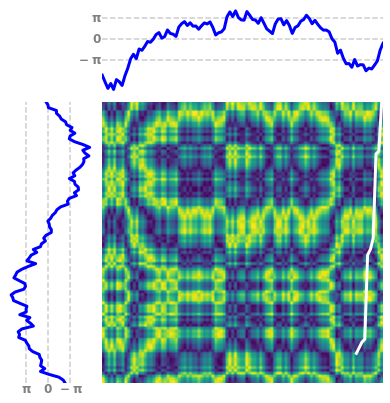

In [3]:
# Author: Daniela Duarte
# License: BSD 3 clause
# sphinx_gallery_thumbnail_number = 2

import numpy as np
from numpy import pi
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from tslearn.generators import random_walks
from tslearn import metrics
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


np.random.seed(0)
n_ts, sz = 2, 100


# Example : Length of the arc between two angles on a circle
def arc_length(angle_1, angle_2, r=1.):
    """Length of the arc between two angles (in rad) on a circle of
    radius r.
    """
    # Compute the angle between the two inputs between 0 and 2*pi.
    theta = np.mod(angle_2 - angle_1, 2*pi)
    if theta > pi:
        theta = theta - 2 * pi
    # Return the length of the arc
    L = r * np.abs(theta)
    return(L)


dataset_1 = random_walks(n_ts=n_ts, sz=sz, d=1)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=pi)  # Rescale the time series
dataset_scaled_1 = scaler.fit_transform(dataset_1)

# LCSS using a function as the metric argument
path_1, sim_1 = metrics.lcss_path_from_metric(
    dataset_scaled_1[0], dataset_scaled_1[1], metric=arc_length
)

# Plots
# Compute the distance matrices for the plot
distances_1 = pairwise_distances(
    dataset_scaled_1[0], dataset_scaled_1[1], metric=arc_length
)

# Definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_dist = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

# Plot example
plt.figure(1, figsize=(6, 6))
ax_dist = plt.axes(rect_dist)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

ax_dist.imshow(distances_1, origin='lower')
ax_dist.axis("off")
ax_dist.autoscale(False)
ax_dist.plot(*zip(*path_1), "w-", linewidth=3.)

ticks_location = [-pi, 0, pi]
ticks_labels = [r"$\bf-\pi$", r"$\bf0$", r"$\bf\pi$"]

ax_s_x.plot([0, sz - 1], [ticks_location]*2, "k--", alpha=.2)
ax_s_x.plot(np.arange(sz), dataset_scaled_1[1], "b-", linewidth=3.)
ax_s_x.set_xlim((0, sz - 1))
ax_s_x.axis("off")

ax_s_y.plot([ticks_location]*2, [0, sz - 1], "k--", alpha=.2)
ax_s_y.plot(-dataset_scaled_1[0], np.arange(sz), "b-", linewidth=3.)
ax_s_y.set_ylim((0, sz - 1))
ax_s_y.axis("off")

for loc, s in zip(ticks_location, ticks_labels):
    ax_s_x.text(0, loc, s, fontsize="large", color="grey",
                horizontalalignment="right", verticalalignment="center")
    ax_s_y.text(-loc, 0, s, fontsize="large", color="grey",
                horizontalalignment="center", verticalalignment="top")

# plt.tight_layout()
plt.show()